In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels as sm
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

## Problem 1

In [2]:
uffi = pd.read_csv("data/uffi.txt", header=0, sep="\t")
uffi.head()

,CH2O,AIR,UFFI
0,31.33,0,0
1,28.57,1,0
2,39.95,1,0
3,44.98,4,0
4,39.55,4,0


a)

Assuming equal variance of CH2O among UFFI groups, we want to know whether difference between average level of CH2O between the groups is significant. The null hypothesis claims that means are the same, thus t-statisic is 0. How significant is deviation of t-statistic from zero?

In [3]:
def ttest(data, target, group):
    gr_vals = np.unique(data[group])
    assert gr_vals.shape[0] == 2
    tstat, pval, df = ttest_ind(data[data[group] == gr_vals[0]][target],
                                data[data[group] == gr_vals[1]][target])
    return pd.DataFrame({"t-test stat": [tstat],
                         "p": [pval],
                         "df": [df]}, index=[target])
ttest(uffi, "CH2O", "UFFI")

,t-test stat,p,df
CH2O,-2.252544,0.034598,22.0


Based on the t-test, difference of means between groups is significant, and null hypothesis can be disregarded at the confidence level 95%.

Now we will run a linear regression model to fit the dependency of CH2O on UFFI group. Within the linear regression summary t-test for significance of the UFFI covariate is provided. It verifies how significant is the deviation of the fitting coefficient from 0, so it verifies how significant is the effect of the correponding covariate.

In [4]:
smf.ols("CH2O ~ UFFI", data=uffi).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CH2O   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     5.074
Date:                Tue, 02 Jun 2020   Prob (F-statistic):             0.0346
Time:                        21:48:45   Log-Likelihood:                -87.952
No. Observations:                  24   AIC:                             179.9
Df Residuals:                      22   BIC:                             182.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.1217      2.849     16.191      0.000      40.214      52.029
UFFI           9.0742      4.028      2.253      0.035       0.720      17.429
==============================================================================
Omnibus:                        1.383   Durbin-Watson:                   0.653
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                0.908
Skew:                          -0.020   Prob(JB):                        0.635
Kurtosis:                       2.048   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comparing the significance tests for means and taken from the linear regression, we see the expected result, p-values are equal and both claim that effect is significant within 95% confidence level.

b)

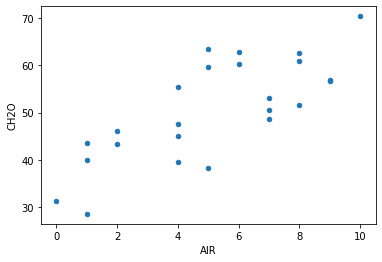

In [5]:
uffi.plot(x="AIR", y="CH2O", kind="scatter")

We see linear trend in the dependency of CH2O on the AIR. To quantify what we see, we can compute Pearson's correlation coefficient between CH2O and AIR. We expect it to be high (meaning close to 1).

In [6]:
sp.stats.pearsonr(uffi["AIR"], uffi["CH2O"])[0]

0.7650847476370517

In [7]:
smf.ols("CH2O ~ AIR", data=uffi).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CH2O   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     31.06
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.33e-05
Time:                        21:48:45   Log-Likelihood:                -79.879
No. Observations:                  24   AIC:                             163.8
Df Residuals:                      22   BIC:                             166.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.1533      2.974     12.156      0.000      29.985      42.321
AIR            2.8303      0.508      5.573      0.000       1.777       3.884
==============================================================================
Omnibus:                        1.949   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.076
Skew:                           0.073   Prob(JB):                        0.584
Kurtosis:                       1.973   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After fitting linear regression for CH2O as a function of AIR we discover that AIR is a significant predictor of CH2O level within 99% confidence.

Moreover we can have a look at R^2 coefficient. It describes the fraction of variance that has been augmented by linear regression in comparison to the total variance of the data. It has relation to the Pearson's correlation coefficient: $R^2 = \rho^2$

Let's compute $\rho^2$ and compare to $R^2$:

In [8]:
sp.stats.pearsonr(uffi["AIR"], uffi["CH2O"])[0]**2

0.5853546710668511

c)

In [9]:
smf.ols("CH2O ~ UFFI + AIR", data=uffi).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CH2O   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     37.82
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.10e-07
Time:                        21:48:46   Log-Likelihood:                -72.126
No. Observations:                  24   AIC:                             150.3
Df Residuals:                      21   BIC:                             153.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.3734      2.461     12.750      0.000      26.256      36.491
UFFI           9.3120      2.133      4.367      0.000       4.877      13.747
AIR            2.8545      0.376      7.584      0.000       2.072       3.637
==============================================================================
Omnibus:                        0.667   Durbin-Watson:                   1.394
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.659
Skew:                          -0.054   Prob(JB):                        0.719
Kurtosis:                       2.196   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Results of multiple linear regression claim that both covariates are significant, moreover corresponding fitted coefficients haven't changed their values much. The main difference lies in the intercept. It gives a hint that two covariates are independent.

## Problem 2

In [10]:
drvisits = pd.read_csv("data/drvisits.txt", sep="\t")
drvisits.columns = [c.strip() for c in drvisits.columns]
drvisits.head()

,numvisit,age,educ,married,badh,loginc,reform
0,1,45,10.5,0,0,7.636776,0
1,9,53,9.0,1,1,7.699212,0
2,40,48,10.5,0,1,7.057358,0
3,0,52,18.0,0,0,7.688554,1
4,1,40,10.5,0,0,7.541466,0


a)

Number of doctoral visits is measured within the time range of 3 months. Basically, the model explains the rate, assuming it is constant in time, but changes as a function of covariates.

In [11]:
drvisits_reform_pois = smf.poisson("numvisit ~ reform", data=drvisits).fit()
drvisits_reform_pois.summary()

Optimization terminated successfully.
         Current function value: 2.978283
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               numvisit   No. Observations:                 2227
Model:                        Poisson   Df Residuals:                     2225
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:                0.003688
Time:                        21:48:46   Log-Likelihood:                -6632.6
converged:                       True   LL-Null:                       -6657.2
Covariance Type:            nonrobust   LLR p-value:                 2.422e-12
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0406      0.018     58.069      0.000       1.005       1.076
reform        -0.1848      0.026     -6.995      0.000      -0.237      -0.133
==============================================================================
"""

Rate ratio represents how the rate will change if one of the covariates get an increase of 1 unit. Since the link function is exponential, subtraction doesn't give us direct connection to fitted coefficients, while division does.

Below we provide rate ratio for `reform` covariate, and its 95% confidence interval:

In [12]:
def rr_confint(model, confidence_level=0.05):
    res = drvisits_reform_pois.conf_int(0.05)
    res.drop(index=["Intercept"], inplace=True)
    res.columns = ["[0.025", "0.975]"]
    res.insert(0, "RR", drvisits_reform_pois.params, True)
    res = np.exp(res)
    return res
rr_confint(drvisits_reform_pois, confidence_level=0.05)

,RR,[0.025,0.975]
reform,0.831235,0.789281,0.875418


b)

In [13]:
smf.poisson("numvisit ~ age + educ + married + badh + loginc + reform", data=drvisits).fit().summary()

Optimization terminated successfully.
         Current function value: 2.668489
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               numvisit   No. Observations:                 2227
Model:                        Poisson   Df Residuals:                     2220
Method:                           MLE   Df Model:                            6
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:                  0.1073
Time:                        21:48:46   Log-Likelihood:                -5942.7
converged:                       True   LL-Null:                       -6657.2
Covariance Type:            nonrobust   LLR p-value:                1.316e-305
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4137      0.269     -1.537      0.124      -0.941       0.114
age            0.0044      0.001      3.352      0.001       0.002       0.007
educ          -0.0107      0.006     -1.785      0.074      -0.022       0.001
married        0.0414      0.028      1.485      0.137      -0.013       0.096
badh           1.1332      0.030     37.396      0.000       1.074       1.193
loginc         0.1492      0.036      4.140      0.000       0.079       0.220
reform        -0.1402      0.027     -5.279      0.000      -0.192      -0.088
==============================================================================
"""

Covariates with high significance are: age, badh, loginc and reform. Education can be included within 95% confidence, but it is at the edge, so it is arguable.

Some of them are expected to be correlated, like age and badh. Elder people tend to have more health problems. Both coefficients are positive, as expected.

The better is education the lesser people attend doctor, possibly because they can avoid some dangers. Also people that can afford education expected to have higher income. This connection, however, doesn't seem to be explicit in this table. Since data is collected in Germany, their education is free and might be independent on income status.

Married people attend doctor more frequently, possibly because of their children.

Finally, in assumption that there are no interactions, reform has decreased frequency of visits. But `reform` has changed its fitted value after inclusion of other parameters. It means that there are interactions. For instance, `badh` and `reform` could be dependent. If reform indeed decreased number of visits, it means lesser amount of people should be in poor health condition.

Finally, let's test significance of `badh` and `reform`. We can do this in two ways. 1st approach is to take a Wald test, and check p-value of `badh` or `reform` separately. This is the number shown in front of each coefficient in the table below. Another approach is to compare deviances by conducting the likelihood test. Null hypothesis here will be: both coefficients are zero. Likelihood for this case is also provided in the table as null-Likelihood. Log  likelihood ratio p-value shows the probability that the difference in likelihoods is accidental. From the table it follows that the coincidence is very improbable, so at least one of the parameters is definitely non-zero.

In [14]:
smf.poisson("numvisit ~ badh + reform", data=drvisits).fit().summary()

Optimization terminated successfully.
         Current function value: 2.677912
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               numvisit   No. Observations:                 2227
Model:                        Poisson   Df Residuals:                     2224
Method:                           MLE   Df Model:                            2
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:                  0.1042
Time:                        21:48:46   Log-Likelihood:                -5963.7
converged:                       True   LL-Null:                       -6657.2
Covariance Type:            nonrobust   LLR p-value:                6.688e-302
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7915      0.020     39.212      0.000       0.752       0.831
badh           1.1653      0.029     40.201      0.000       1.109       1.222
reform        -0.1340      0.026     -5.061      0.000      -0.186      -0.082
==============================================================================
"""

c)

Below we will fit different models with non-linear interactions included. We will also comment on the results under each group of tables.

In [15]:
smf.poisson("numvisit ~ age + age_sq + educ + married + badh + loginc + reform", data=drvisits.assign(age_sq=drvisits["age"]**2)).fit().summary()

Optimization terminated successfully.
         Current function value: 2.667609
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               numvisit   No. Observations:                 2227
Model:                        Poisson   Df Residuals:                     2219
Method:                           MLE   Df Model:                            7
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:                  0.1076
Time:                        21:48:46   Log-Likelihood:                -5940.8
converged:                       True   LL-Null:                       -6657.2
Covariance Type:            nonrobust   LLR p-value:                3.009e-305
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0699      0.320     -0.219      0.827      -0.696       0.557
age           -0.0150      0.010     -1.523      0.128      -0.034       0.004
age_sq         0.0002      0.000      1.985      0.047    3.09e-06       0.000
educ          -0.0092      0.006     -1.510      0.131      -0.021       0.003
married        0.0534      0.029      1.872      0.061      -0.003       0.109
badh           1.1349      0.030     37.403      0.000       1.075       1.194
loginc         0.1475      0.036      4.091      0.000       0.077       0.218
reform        -0.1398      0.027     -5.266      0.000      -0.192      -0.088
==============================================================================
"""

In [16]:
smf.poisson("numvisit ~ age + age_log + educ + married + badh + loginc + reform", data=drvisits.assign(age_log=np.log(drvisits["age"]))).fit().summary()

Optimization terminated successfully.
         Current function value: 2.668187
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               numvisit   No. Observations:                 2227
Model:                        Poisson   Df Residuals:                     2219
Method:                           MLE   Df Model:                            7
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:                  0.1074
Time:                        21:48:46   Log-Likelihood:                -5942.1
converged:                       True   LL-Null:                       -6657.2
Covariance Type:            nonrobust   LLR p-value:                1.085e-304
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6034      0.916      0.659      0.510      -1.191       2.398
age            0.0148      0.009      1.630      0.103      -0.003       0.033
age_log       -0.3964      0.341     -1.162      0.245      -1.065       0.272
educ          -0.0097      0.006     -1.598      0.110      -0.022       0.002
married        0.0482      0.028      1.691      0.091      -0.008       0.104
badh           1.1342      0.030     37.396      0.000       1.075       1.194
loginc         0.1486      0.036      4.121      0.000       0.078       0.219
reform        -0.1400      0.027     -5.272      0.000      -0.192      -0.088
==============================================================================
"""

Two tables above test whether age has log or polynomial non-linearities. Both possibilities gain insignificant effect, so can be disregarded. Next we are going to test education in the similar way.

In [17]:
smf.poisson("numvisit ~ age + educ + educ_sq + married + badh + loginc + reform", data=drvisits.assign(educ_sq=drvisits["educ"]**2)).fit().summary()

Optimization terminated successfully.
         Current function value: 2.667151
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               numvisit   No. Observations:                 2227
Model:                        Poisson   Df Residuals:                     2219
Method:                           MLE   Df Model:                            7
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:                  0.1078
Time:                        21:48:47   Log-Likelihood:                -5939.7
converged:                       True   LL-Null:                       -6657.2
Covariance Type:            nonrobust   LLR p-value:                1.089e-305
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9411      0.347     -2.713      0.007      -1.621      -0.261
age            0.0048      0.001      3.659      0.000       0.002       0.007
educ           0.0843      0.040      2.120      0.034       0.006       0.162
educ_sq       -0.0038      0.002     -2.417      0.016      -0.007      -0.001
married        0.0415      0.028      1.491      0.136      -0.013       0.096
badh           1.1312      0.030     37.328      0.000       1.072       1.191
loginc         0.1415      0.036      3.915      0.000       0.071       0.212
reform        -0.1416      0.027     -5.333      0.000      -0.194      -0.090
==============================================================================
"""

In [18]:
smf.poisson("numvisit ~ age + educ + educ_log + married + badh + loginc + reform", data=drvisits.assign(educ_log=np.log(drvisits["educ"]))).fit().summary()

Optimization terminated successfully.
         Current function value: 2.667105
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               numvisit   No. Observations:                 2227
Model:                        Poisson   Df Residuals:                     2219
Method:                           MLE   Df Model:                            7
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:                  0.1078
Time:                        21:48:47   Log-Likelihood:                -5939.6
converged:                       True   LL-Null:                       -6657.2
Covariance Type:            nonrobust   LLR p-value:                9.836e-306
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8864      0.658     -2.865      0.004      -3.177      -0.596
age            0.0048      0.001      3.634      0.000       0.002       0.007
educ          -0.0974      0.036     -2.718      0.007      -0.168      -0.027
educ_log       1.0393      0.423      2.455      0.014       0.209       1.869
married        0.0417      0.028      1.499      0.134      -0.013       0.096
badh           1.1312      0.030     37.324      0.000       1.072       1.191
loginc         0.1412      0.036      3.904      0.000       0.070       0.212
reform        -0.1412      0.027     -5.315      0.000      -0.193      -0.089
==============================================================================
"""

Education shows also significance at the edge of confidence level, and still lies orders of magnitude farther from the effects with the highest significance.

Finally, regarding log income, we don't test for logarithmic correction to it, we only check for quadratic contribution

In [19]:
smf.poisson("numvisit ~ age + educ + married + badh + loginc + loginc_sq + reform", data=drvisits.assign(loginc_sq=drvisits["loginc"]**2)).fit().summary()

Optimization terminated successfully.
         Current function value: 2.666241
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               numvisit   No. Observations:                 2227
Model:                        Poisson   Df Residuals:                     2219
Method:                           MLE   Df Model:                            7
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:                  0.1081
Time:                        21:48:47   Log-Likelihood:                -5937.7
converged:                       True   LL-Null:                       -6657.2
Covariance Type:            nonrobust   LLR p-value:                1.443e-306
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.9020      3.425     -3.183      0.001     -17.615      -4.189
age            0.0046      0.001      3.543      0.000       0.002       0.007
educ          -0.0101      0.006     -1.684      0.092      -0.022       0.002
married        0.0403      0.028      1.446      0.148      -0.014       0.095
badh           1.1347      0.030     37.460      0.000       1.075       1.194
loginc         2.8859      0.891      3.238      0.001       1.139       4.633
loginc_sq     -0.1784      0.058     -3.074      0.002      -0.292      -0.065
reform        -0.1396      0.027     -5.257      0.000      -0.192      -0.088
==============================================================================
"""

From the report we discover that log income has a significant effect and can be included into the final model to account for the non-linearities.

d)

By definition, mean and variance of Poisson distribution are equal. This can be a good test for data, to check whether it could be fitted by Poisson process. This is useful when we are trying to find common rate for entire data. In our case this estimate gives us only a vague idea about the suitability of the Poisson model. The thing is that rate and thus mean and variance can vary depending on the hyperparameters like age, badh, etc.

In [20]:
np.std(drvisits["numvisit"])**2/drvisits["numvisit"].mean()

6.227030355079969

In addition to the directly computed overdispersion coefficient we suggest somewhat more specific coefficient. We split data into groups according to the categorical variables + we turn scalar covariates into categorical by histogramming. In this setting, we expect that Poisson rate won't change a lot within each group, and we suggest calculating average with weights proportional to the number of elements in each group. So those group with better statistics contribute more massively into the coefficient estimate.

In assumption that data is sampled from poisson model, our coefficient should be 1.

In [21]:
def overdispersion_coef(data):
    summary = data \
        .assign(loginc_hist=np.searchsorted(np.histogram(drvisits["loginc"], 3)[1], drvisits["loginc"])) \
        .assign(age_hist=np.searchsorted(np.histogram(drvisits["age"], 4)[1], drvisits["age"])) \
        .groupby(["badh", "reform", "age_hist", "loginc_hist"])["numvisit"] \
        .agg([pd.NamedAgg("num", lambda x: x.shape[0]),
              pd.NamedAgg("mean", np.mean),
              pd.NamedAgg("variance", lambda x: np.std(x)**2)]) \
        .sort_values("num", ascending=True)
    
    print("First 20 smallest groups")
    display(summary[:20])
    
    mean_coef = np.sum(summary["variance"]**2/summary["mean"]*summary["num"])/np.sum(summary["num"])
    
    print("Weighted average overdispersion coefficient")
    display(mean_coef)
overdispersion_coef(drvisits)

First 20 smallest groups


num       mean   variance
badh reform age_hist loginc_hist                           
0    0      0        1              1   0.000000   0.000000
1    0      1        1              1   4.000000   0.000000
            2        3              1   0.000000   0.000000
     1      1        3              1   3.000000   0.000000
0    0      2        0              1   0.000000   0.000000
1    1      1        1              1   9.000000   0.000000
            0        2              1   8.000000   0.000000
     0      1        3              2   5.000000   1.000000
            0        2              2   2.500000   0.250000
            4        1              2   9.000000   9.000000
     1      2        1              2   4.500000   2.250000
            3        1              2   2.000000   1.000000
     0      3        3              3   8.666667  33.555556
                     1              3   2.666667   6.222222
0    1      0        1              3   1.666667   1.555556
1    0      4        3              3   2.666667   5.555556
            2        1              4   3.500000   5.250000
     1      4        1              4   3.250000   8.687500
0    1      4        1              4   5.250000  72.687500
1    1      4        3              4  13.750000  17.187500

Weighted average overdispersion coefficient


103.1732207818216

First of all, we observe that there exist groups with 1 or 2 elements, so there is not enough statistics to properly fit such a model. Moreover, we've got coefficient of order 100 when it should be close to 1. This is a strong sign towards overdispersion of the data.

There are alternative ways to approach overdispersed data within generalized linear model familiy of algorithims. We can either tune the link function of the poisson based glm, or we can change the distribution to include more parameters to disconnect mean and variance.

In [22]:
smf.glm("numvisit ~ age + badh + loginc + reform", data=drvisits, family=sm.genmod.families.Poisson(sm.genmod.families.links.sqrt())).fit().summary()

/home/vindex10/projects/.venvs/sandbox/lib64/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:277: DomainWarning: The sqrt link function does not respect the domain of the Poisson family.
  family.__class__.__name__), DomainWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               numvisit   No. Observations:                 2227
Model:                            GLM   Df Residuals:                     2222
Model Family:                 Poisson   Df Model:                            4
Link Function:                   sqrt   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5947.1
Date:                Tue, 02 Jun 2020   Deviance:                       7428.6
Time:                        21:48:47   Pearson chi2:                 9.69e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5455      0.217      2.511      0.012       0.120       0.971
age            0.0044      0.001      4.392      0.000       0.002       0.006
badh           1.1158      0.034     32.658      0.000       1.049       1.183
loginc         0.1020      0.028      3.620      0.000       0.047       0.157
reform        -0.1092      0.021     -5.140      0.000      -0.151      -0.068
==============================================================================
"""

It turns out that tuning the link, by choosing Square Root link doesn't help much. We can compare models by comparing likelihood values. And for the tuned model we didn't get closer to 0. Let's try another model, Negative Binomial model. This one has more parameters, so mean and variance are independent parameters of the distribution.

In [23]:
smf.negativebinomial("numvisit ~ age + badh + loginc + reform", data=drvisits).fit().summary()

Optimization terminated successfully.
         Current function value: 2.049168
         Iterations: 25
         Function evaluations: 29
         Gradient evaluations: 29


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:               numvisit   No. Observations:                 2227
Model:               NegativeBinomial   Df Residuals:                     2222
Method:                           MLE   Df Model:                            4
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:                 0.03185
Time:                        21:48:48   Log-Likelihood:                -4563.5
converged:                       True   LL-Null:                       -4713.6
Covariance Type:            nonrobust   LLR p-value:                 9.597e-64
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4131      0.534     -0.774      0.439      -1.459       0.633
age            0.0058      0.002      2.439      0.015       0.001       0.010
badh           1.1337      0.075     15.196      0.000       0.987       1.280
loginc         0.1291      0.069      1.869      0.062      -0.006       0.264
reform        -0.1387      0.051     -2.717      0.007      -0.239      -0.039
alpha          1.0024      0.048     21.040      0.000       0.909       1.096
==============================================================================
"""

We observe quite an improvement of the likelihood value. Parameter alpha is another parameter of the model, and we have strong evidence of it being non-zero (where 0 makes negative binomial distribution to behave like Poisson) 

## Problem 3

In [24]:
wheezing = pd.read_csv("data/wheezing.txt", sep="\s+")
wheezing.head()

,smoking,age,wheeze
0,0,7,0
1,0,8,0
2,0,9,0
3,0,10,0
4,0,7,0


a)

In [25]:
def summarize(df_dict):
    for label, df in df_dict.items():
        print(f"{label}:")
        display(df)

In [26]:
def grouped_proportion(data, grouper, target):
    res = {}
    
    positives = []
    sums = []
    labels = []
    for g, g_data in data.groupby(grouper)[target]:
        label = ("no_" if not g else "") + grouper
        labels.append(label)
        
        target_0, target_1 = g_data.value_counts()

        positives.append(target_1)
        sums.append(target_0 + target_1)
        
    sums = np.array(sums, dtype=np.float32)
    positives = np.array(positives, dtype=np.float32)
    
    proportions = dict(zip(labels, positives/sums))
    res["proportions"] = pd.DataFrame(proportions, index=[target + "_fraction"]).T
    res["proportions"]["odds"] = res["proportions"][target + "_fraction"]/(1. - res["proportions"][target + "_fraction"])
    
    zstat, pval = proportions_ztest(positives, sums, alternative="two-sided")
    res["ztest"] = pd.DataFrame({"z_stat": zstat,
                                 "pval": pval}, index=["ztest"]).T
    
    res["descriptive"] = pd.DataFrame({"relative_risk": (res["proportions"][target+"_fraction"].loc[grouper]/res["proportions"][target+"_fraction"].loc["no_" + grouper]),
                                       "odds_ratio": (res["proportions"]["odds"].loc[grouper]/res["proportions"]["odds"].loc["no_" + grouper])
                                      }, index=["descriptive"]).T
    
    
    
    return res
summarize(grouped_proportion(wheezing, "smoking", "wheeze"))

proportions:


,wheeze_fraction,odds
no_smoking,0.139286,0.161826
smoking,0.175134,0.212318


ztest:


,ztest
z_stat,-2.206041
pval,0.027381


descriptive:


,descriptive
relative_risk,1.257370
odds_ratio,1.312014


When comparing fractions of wheezing children between smoking and non-smoking groups, we see a slight difference. Mothers who smoke have 4% more children with wheezing.

We can apply z-test to check how significant is the difference. According to p-value, we conclude that it is significant with 95% confidence level.

Relative risk = 1 means we don't see any difference between two groups.

In our case relative risk is > 1, meaning we observe the difference between probabilities. Moreover, since odds ratio hardens the relative risk value, we expect it to be > RR. That's what indeed takes places.

Odds ratio is interesting because that's exactly the value that links pure data to the optimized parameter of the logistic regression model.

b)

In [27]:
wheezing_smoking_logit = smf.logit("wheeze ~ smoking", data=wheezing).fit()
wheezing_smoking_logit.summary()

Optimization terminated successfully.
         Current function value: 0.424652
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 wheeze   No. Observations:                 2148
Model:                          Logit   Df Residuals:                     2146
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:                0.002615
Time:                        21:48:48   Log-Likelihood:                -912.15
converged:                       True   LL-Null:                       -914.54
Covariance Type:            nonrobust   LLR p-value:                   0.02875
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8212      0.077    -23.595      0.000      -1.973      -1.670
smoking        0.2716      0.123      2.202      0.028       0.030       0.513
==============================================================================
"""

Since the link function for logistic regression is logit, to express fitted paramter through probabilities, we should exponentiate it. That's how we match numerically result of logistic regression to the odds ratio computed from data above.

In [28]:
np.exp(wheezing_smoking_logit.params["smoking"])

1.3120142958068688

The connection can be derived in the following way:

$a + b x = logit(p) = \log \frac{p}{1 - p}$

$L = \sum y_i \log p_i + (1 - y_i) \log (1 - p_i) = \sum y_i (a + b x_i) + \log (1 - p_i)$

Optimization conditions:

$\sum \frac{1}{1 + e^{-(a + b x_i)}} = \sum y_i$

$\sum \frac{x_i}{1 + e^{-(a + b x_i)}} =  \sum y_i x_i$

That is equivalent to 

$\sum p_i = \sum y_i$

$\sum x_i p_i =  \sum y_i x_i$

Assuming that we have a binary covariate:

$N_{smoking} p_{smoking} + N_{non-smoking} p_{non-smoking} = N_{wheez}$

$N_{smoking} p_{smoking} = N_{smoking~and~wheez}$


Finally:

$p_{smoking} = \frac{N_{smoking~and~wheez}}{N_{smoking}} \quad  \text{, that is fraction of wheezing within smoking}$

$p_{non-smoking} = \frac{N_{wheez} - N_{smoking~and~wheez}}{N_{non-smoking}} = \frac{N_{non-smoking~and~wheez}}{N_{non-smoking}} \quad \text{, that is fraction of wheezing within non-smoking}$

In [29]:
smf.logit("wheeze ~ age", data=wheezing).fit().summary()

Optimization terminated successfully.
         Current function value: 0.424740
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 wheeze   No. Observations:                 2148
Model:                          Logit   Df Residuals:                     2146
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:                0.002409
Time:                        21:48:48   Log-Likelihood:                -912.34
converged:                       True   LL-Null:                       -914.54
Covariance Type:            nonrobust   LLR p-value:                   0.03580
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7645      0.458     -1.670      0.095      -1.662       0.133
age           -0.1132      0.054     -2.095      0.036      -0.219      -0.007
==============================================================================
"""

Based on the p-value, age doesn't show significant impact on wheezing. But smoking itself is also outside 95% significance level. However, significances are comparable, so at least there is no any reason to prefer any covariate to another one.

In [30]:
smf.logit("wheeze ~ age + smoking", data=wheezing).fit().summary()

Optimization terminated successfully.
         Current function value: 0.423624
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 wheeze   No. Observations:                 2148
Model:                          Logit   Df Residuals:                     2145
Method:                           MLE   Df Model:                            2
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:                0.005029
Time:                        21:48:48   Log-Likelihood:                -909.94
converged:                       True   LL-Null:                       -914.54
Covariance Type:            nonrobust   LLR p-value:                   0.01006
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8630      0.461     -1.873      0.061      -1.766       0.040
age           -0.1134      0.054     -2.097      0.036      -0.219      -0.007
smoking        0.2721      0.123      2.204      0.028       0.030       0.514
==============================================================================
"""

Finally we see that effects of age and smoking are independent in the logistic model. Fitted coefficients and their p-values don't change dramatically when including/excluding covariates.

c)

In [31]:
wheezingb = pd.read_csv("data/wheezingb.txt", sep="\s+")
wheezingb.head()

,id,smoking,age,wheeze
0,1,0,7,0
1,1,0,8,0
2,1,0,9,0
3,1,0,10,0
4,2,0,7,0


Since the data now includes information about subjects, we can treat it as longitudinal. This can give us an ability to adapt coefficients to personal characteristics of each subject.

In [32]:
smf.mixedlm("wheeze ~ 1 + smoking", data=wheezingb, re_formula="0 + age", groups=wheezingb["id"]).fit().summary()

/home/vindex10/projects/.venvs/sandbox/lib64/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: wheeze   
No. Observations: 2148    Method:             REML     
No. Groups:       537     Scale:              0.0854   
Min. group size:  4       Log-Likelihood:     -708.2807
Max. group size:  4       Converged:          Yes      
Mean group size:  4.0                                  
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.144    0.013 10.774 0.000  0.118  0.170
smoking       0.034    0.023  1.499 0.134 -0.010  0.078
age Var       0.001    0.000                           
=======================================================

"""

In this model we assumed that smoking provides similar effect per subject. At the same time, we include random effect of aging per subject. We expect that aging affects different people in different ways, moreover aging also can be a measure of how harmful habits besides smoking influenced subject over the time. That can be also somehow related to the metabolic characteristics of the person.

After all we've got a model that shows likelihood closer to 0 than previous models. That of course has to be verified now on the independent study, because we've seen the data and might have caught a fluctuation.